# Name: Meshank Adhia
## TASK 3 : Read Image from Local Directory

### Importing librabries

In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

### Read Image From Folder

In [2]:
X,y=[],[]
for i in os.listdir('dataset'):
    for j in os.listdir("dataset/"+i):  
        try:
            image = cv2.imread("dataset/"+i+"/"+j) 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image/255,(100,100))  
            X.append(image)                          
            y.append(i)                              
        except Exception as e:
            pass

In [3]:
 X[0].shape

(100, 100)

In [4]:
y[-1]

'with_mask'

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

<Figure size 432x288 with 0 Axes>

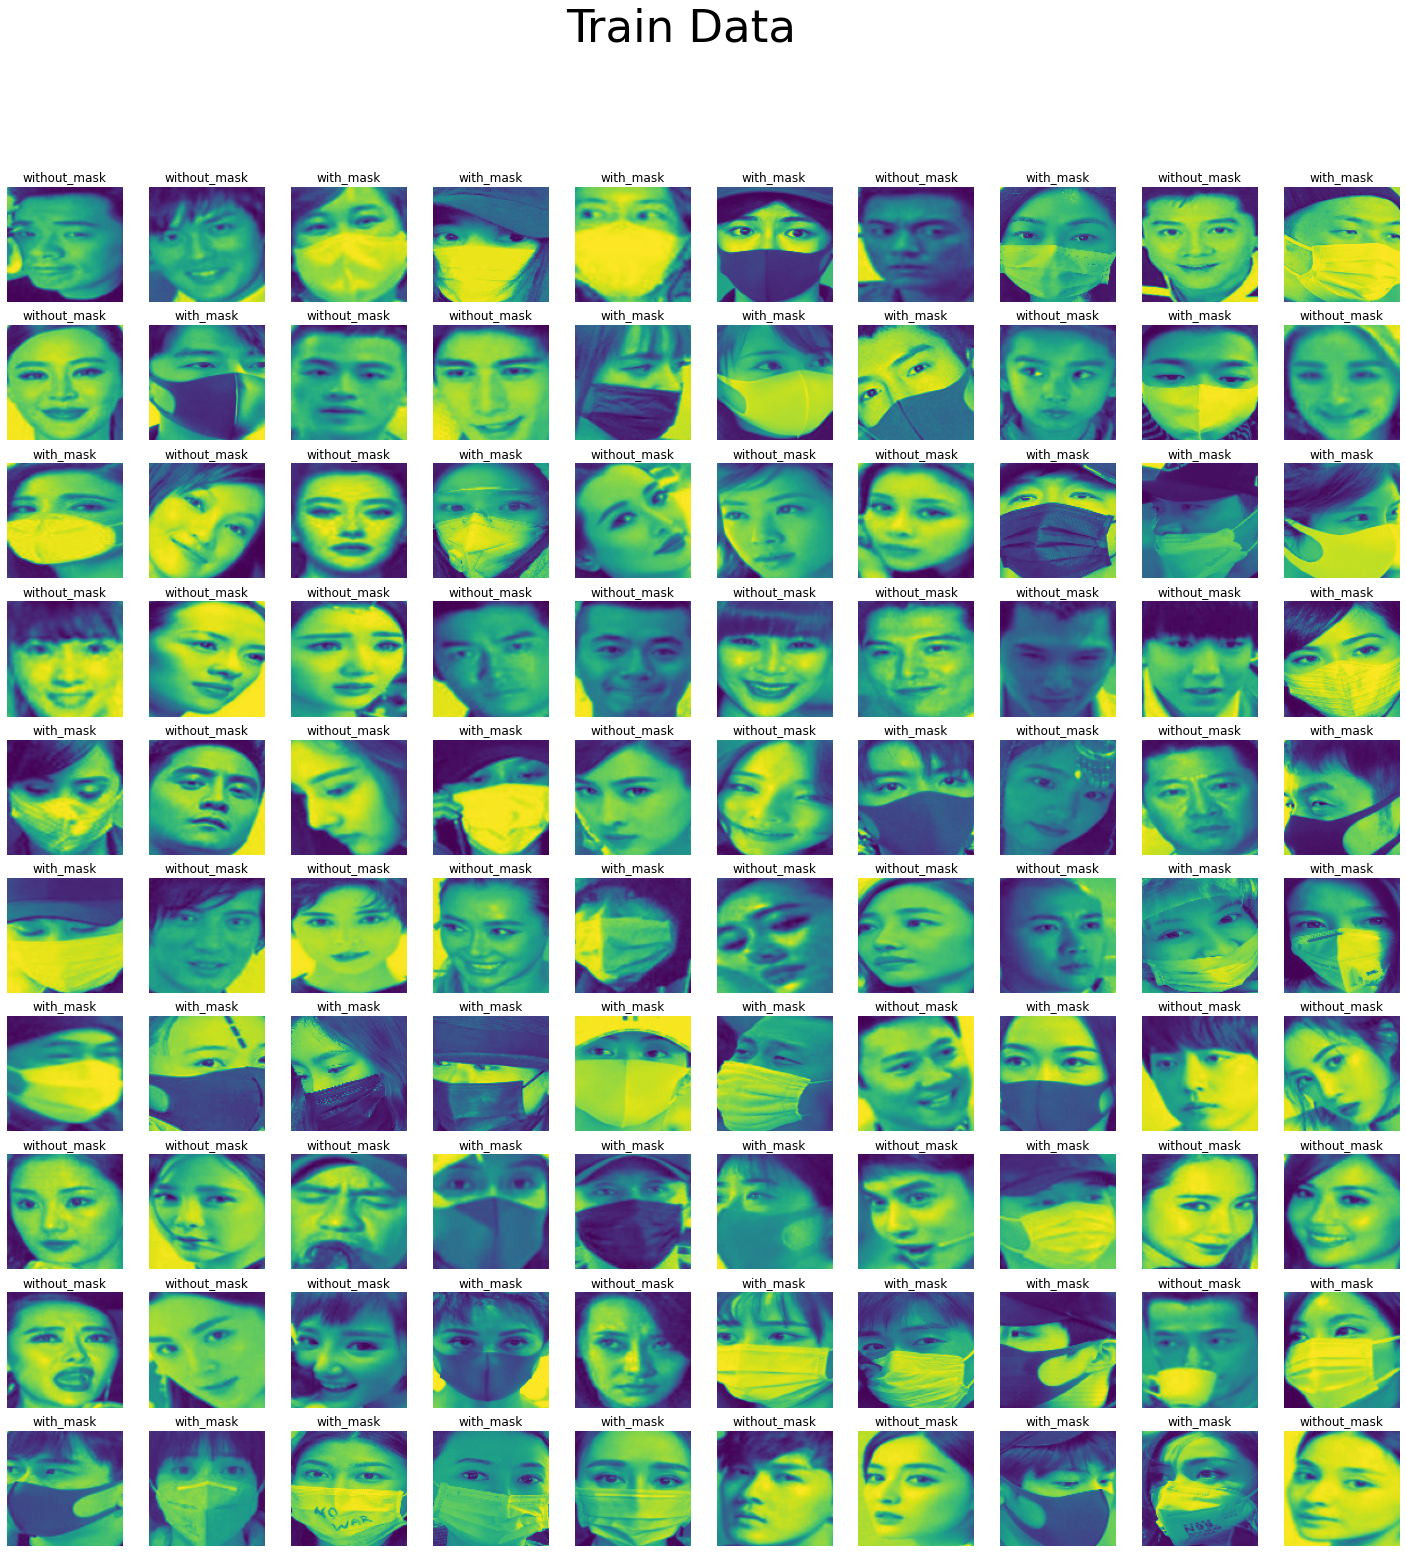

In [6]:
fig = plt.figure()
_, axs = plt.subplots(10,10, figsize=(25,25)) 
axs = axs.flatten()
for img, ax,k in zip(xtrain, axs,ytrain):    
    ax.axis("off")                     
    ax.set_title(k)               
    ax.imshow(img)
plt.suptitle('Train Data',fontsize=45)                
plt.savefig("Training Image.jpg")                  
plt.show()                                           

<Figure size 432x288 with 0 Axes>

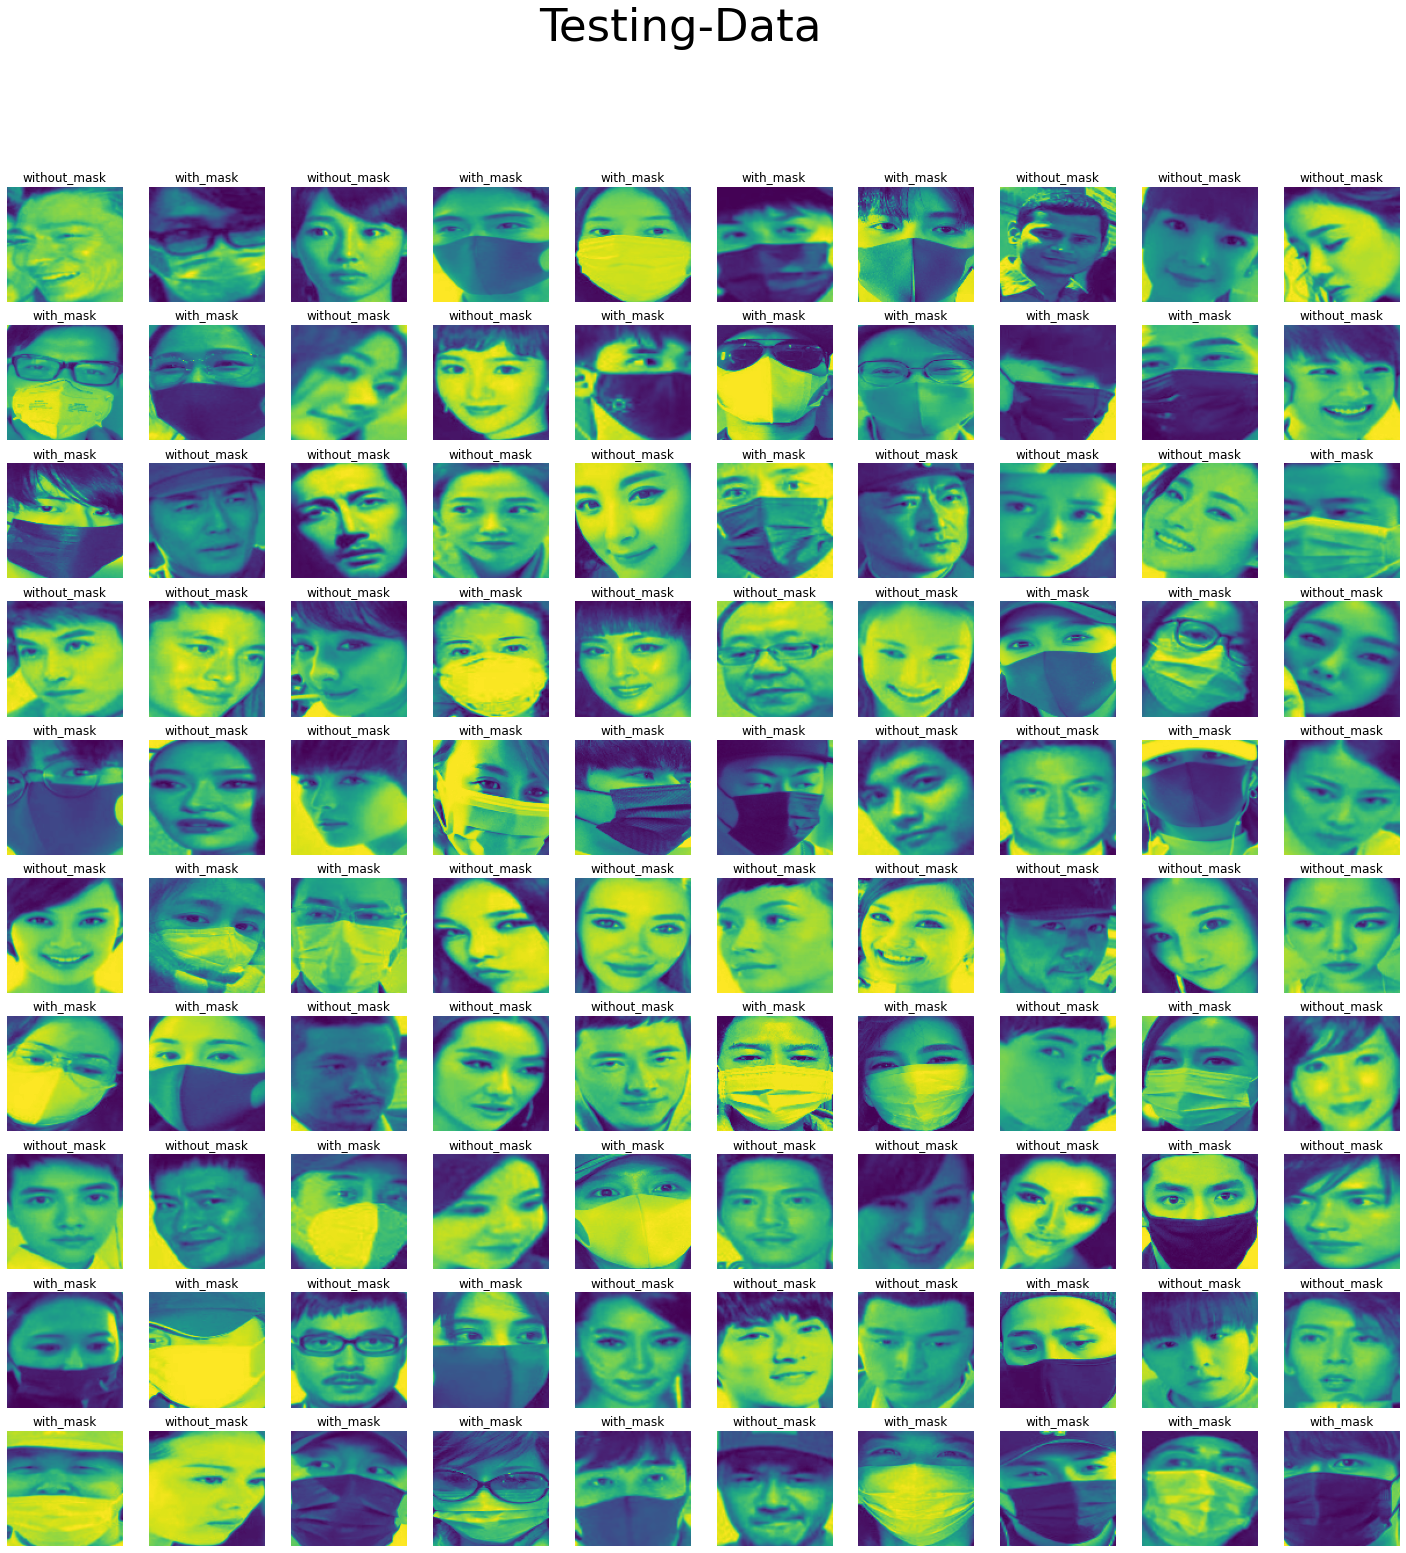

In [7]:
fig = plt.figure()
_, axs = plt.subplots(10,10, figsize=(25,25))
axs = axs.flatten()
for img, ax,k in zip(xtest, axs,ytest):
    ax.axis("off")
    ax.set_title(k)
    ax.imshow(img)
plt.suptitle('Testing-Data',fontsize=45)
plt.savefig("Testing Image.jpg")
plt.show()

In [8]:
xtrain = np.array(xtrain).astype(np.float32)
xtest = np.array(xtest).astype(np.float32)

In [9]:
xtrain[-1].shape

(100, 100)

(100, 100)


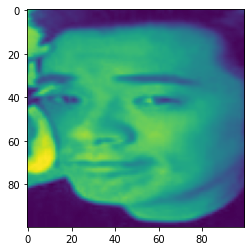

In [10]:
plt.imshow(xtrain[0])
print(xtrain[0].shape)

# Feature Extraction

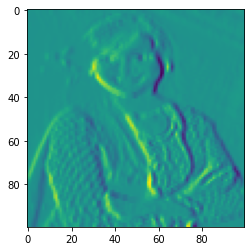

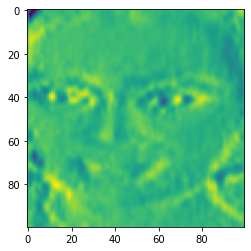

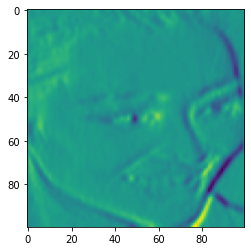

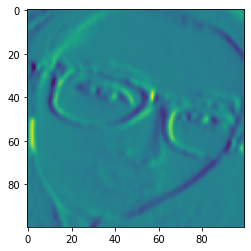

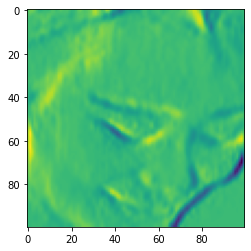

In [11]:
for i in range(5):
    im  = X[i]
#     print(im)
    edges_prewitt_horizontal = prewitt_h(im)
#     plt.imshow(edges_prewitt_horizontal)
    edges_prewitt_vertical = prewitt_v(im)
    plt.imshow(edges_prewitt_vertical)
    plt.show()

# LabelEncoder Technique

In [12]:
from sklearn.preprocessing import LabelEncoder         
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)

In [13]:
ytest

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [14]:
xtrain_reshaped = xtrain.reshape((len(xtrain),-1)) 
xtest_reshaped = xtest.reshape((len(xtest),-1))

In [15]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(xtrain_reshaped,ytrain)
predict = model.predict(xtest_reshaped)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(predict,ytest)*100)

65.76923076923077


In [17]:
print(classification_report(predict,ytest))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70       182
           1       0.46      0.83      0.59        78

    accuracy                           0.66       260
   macro avg       0.68      0.71      0.65       260
weighted avg       0.76      0.66      0.67       260



In [18]:
confusion_matrix(predict,ytest)

array([[106,  76],
       [ 13,  65]], dtype=int64)